##Your Exercise:

Complete the fahsion mnist learning example, using the convolutional NN technique just learned from this section, and send your code here.

You should also compare the learing curves of each epoch between using or not using the convolutional NN technique.



---



### Load the fashion MNIST dataset

In [0]:
# Download the FashionMnist using keras
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('Done..')

4423680/4422102 [==============================] - 0s 0us/step
Done..


### Preprocess the data

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255.

In [0]:
training_images=training_images/255.0
test_images=test_images/255.0
print('Done..')

Done..


In [0]:
training_images.shape

(60000, 28, 28)

### Plot the data

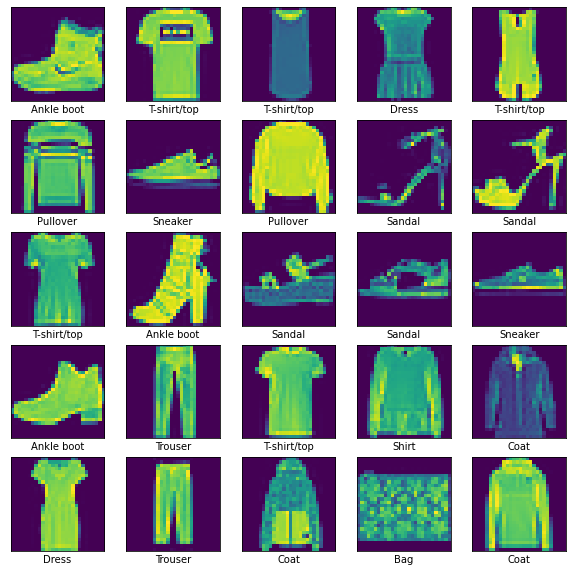

In [0]:
# your code here
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(training_images[i])
  plt.xlabel(class_names[training_labels[i]])
plt.show()

### Build the Model

Without convolutional layer: (we give an example here)

In [0]:
# No Convolutional Layer 
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
no_conv_hist = model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5012 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3769 - accuracy: 0.8657
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3394 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3135 - accuracy: 0.8841
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8730
Test loss: 0.35189202427864075, Test accuracy: 87.30000257492065


With convolutional layer:

In [0]:
# No Convolutional Layer 
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0

training_images = training_images.reshape((len(training_images), 28, 28, 1))
test_images = test_images.reshape((len(test_images), 28, 28, 1))
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPool2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPool2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
conv_hist = model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4344 - accuracy: 0.8434
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2926 - accuracy: 0.8925
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2477 - accuracy: 0.9075
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2152 - accuracy: 0.9201
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2461 - accuracy: 0.9109
Test loss: 0.2460637241601944, Test accuracy: 91.08999967575073


Compare the learning curve:

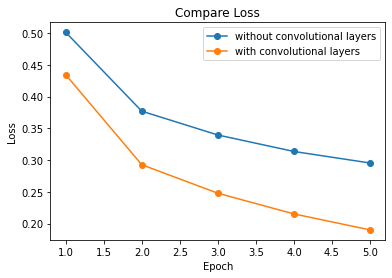

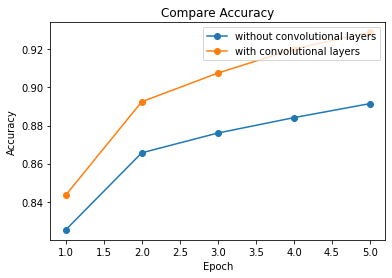

In [0]:
# your code here
import matplotlib.pyplot as plt
epoch=[i for i in range (1, len(no_conv_hist.history['loss']) + 1)]
plt.plot(epoch,no_conv_hist.history['loss'],'o-',label= 'without convolutional layers')
plt.plot(epoch,conv_hist.history['loss'],'o-',label='with convolutional layers')
plt.title('Compare Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

plt.plot(epoch,no_conv_hist.history['accuracy'],'o-',label= 'without convolutional layers')
plt.plot(epoch,conv_hist.history['accuracy'],'o-',label='with convolutional layers')
plt.title('Compare Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()